In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/pdf_reports/

/content/gdrive/MyDrive/pdf_reports


In [3]:
# !git clone https://github.com/ydataai/pdf_reports

In [4]:
%cd pdf_reports

/content/gdrive/MyDrive/pdf_reports/pdf_reports


In [5]:
# !python setup.py install --user

In [6]:
!pip install pdf_reports

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.6/267.6 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 848.9/848.9 kB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 89.5 MB/s eta 0:00:00


In [7]:
# !pip install pypugjs
# !pip install weasyprint

In [8]:
# !pip install pycairo

In [9]:
!ls

build  examples     LICENCE.txt  pdf_reports.egg-info  Regression.pdf  tests
dist   ez_setup.py  MANIFEST.in  pypi-readme.rst       screenshot.png
docs   json_files   pdf_reports  README.rst	       setup.py


Generating Tables into Dataframes from Json

Iris Table

In [10]:
import pandas as pd
from tabulate import tabulate

# Read JSON file
with open('json_files/table.json', 'r') as file:
    data = pd.read_json(file)

# Normalize the JSON data
dataframe = pd.json_normalize(data['data'])

# Display table
dataframe

# Convert DataFrame to HTML
html_table = dataframe.to_html(classes=['ui', 'celled', 'table'], justify='center')

# Add CSS style to center align text
html_table = html_table.replace('<table', '<table style="text-align: center;"')

In [11]:
dataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,versicolor
2,4.7,3.2,1.3,0.2,virginica
3,4.6,3.1,1.5,0.2,setosa


Performance Table, including Precision, Recall, Accuracy and F1


In [12]:
import pandas as pd
import json

# Read data from JSON file
with open('json_files/performance.json', 'r') as file:
    data = json.load(file)

# Convert data to a DataFrame
df = pd.DataFrame.from_dict(data, orient='index', columns=['Value'])

# Convert DataFrame to HTML
html_table_performance = df.to_html(classes=['ui', 'celled', 'table'], justify='center')

# Add CSS style to center align text
html_table_performance = html_table_performance.replace('<table', '<table style="text-align: center;"')


PLOTS

Multicolor Bar Plot

Enter color for 'setosa': red
Enter color for 'versicolor': green
Enter color for 'virginica': blue


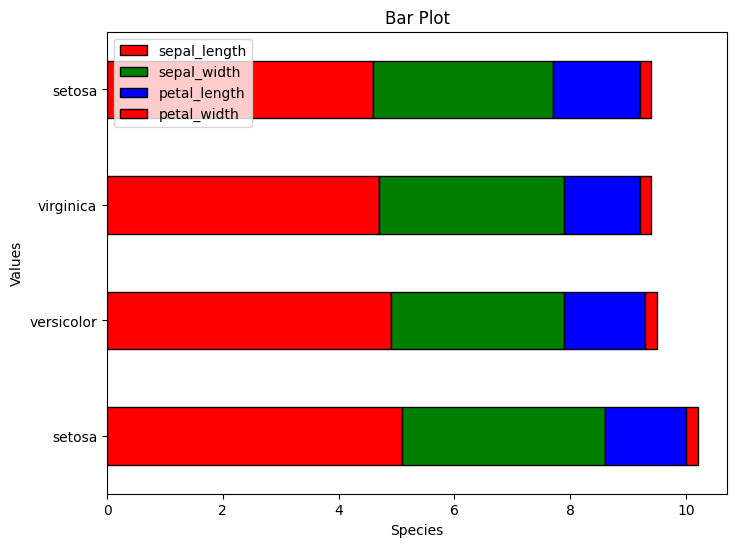

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import base64
from io import BytesIO

def generate_user_colored_bar_plot(df, color_column, figsize=(8, 6)):
    unique_categories = df[color_column].unique()
    color_mapping = {}

    for category in unique_categories:
        color = input(f"Enter color for '{category}': ")
        color_mapping[category] = color

    colors = [color_mapping[i] for i in df[color_column]]

    fig, ax = plt.subplots(figsize=figsize)
    df.plot(x=color_column, kind='barh', stacked=True, color=colors, edgecolor='black', ax=ax)
    ax.set_title('Bar Plot')
    ax.set_xlabel(color_column.capitalize())
    ax.set_ylabel('Values')

    # Save the plot as an image in a variable
    buffer = BytesIO()
    fig.savefig(buffer, format='png')
    buffer.seek(0)
    image_base64 = base64.b64encode(buffer.getvalue()).decode('utf-8')
    plt.show()  # Close the plot to clear the figure

    return image_base64

# Call the function with your DataFrame and the column to use for color grouping
multicolor_bar_image_base64 = generate_user_colored_bar_plot(dataframe, color_column='species', figsize=(8, 6))


Precision/Recall - Performance Plot

Enter color for 'precision' (e.g., 'blue', '#FF5733'): yellow
Enter color for 'recall' (e.g., 'blue', '#FF5733'): green
Enter color for 'f1' (e.g., 'blue', '#FF5733'): red
Enter color for 'accuracy' (e.g., 'blue', '#FF5733'): black


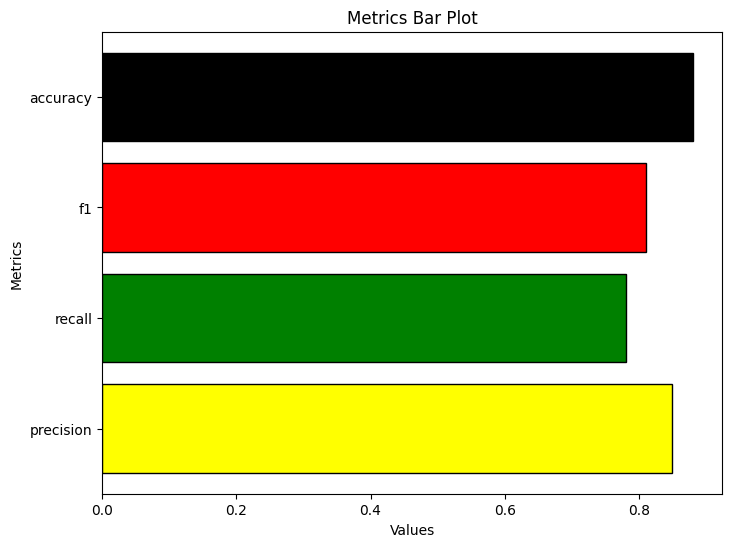

In [14]:
import json
import matplotlib.pyplot as plt
import numpy as np
import base64
from io import BytesIO

# Read data from JSON file
with open('json_files/performance.json', 'r') as file:
    data = json.load(file)

# Extract the metric names and values
metrics = list(data.keys())
values = list(data.values())

# Generate y-axis positions for the bars
y_pos = np.arange(len(metrics))

# Ask the user for colors for each metric
color_dict = {}
for metric in metrics:
    color = input(f"Enter color for '{metric}' (e.g., 'blue', '#FF5733'): ")
    color_dict[metric] = color

# Get the corresponding colors for each metric
colors = [color_dict[metric] for metric in metrics]

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(y_pos, values, color=colors, edgecolor='black')

# Set the tick labels and the title
ax.set_yticks(y_pos)
ax.set_yticklabels(metrics)
ax.set_xlabel('Values')
ax.set_ylabel('Metrics')
ax.set_title('Metrics Bar Plot')

# Save the plot as an image in a variable
buffer = BytesIO()
fig.savefig(buffer, format='png')
buffer.seek(0)
image1_base64 = base64.b64encode(buffer.getvalue()).decode('utf-8')
plt.show() # Close the plot to clear the figure


Confusion Matrix Plot

Enter colormap for confusion matrix (e.g., 'Blues', 'Greens'): Greens
Enter text color for confusion matrix (e.g., 'white', 'black'): black


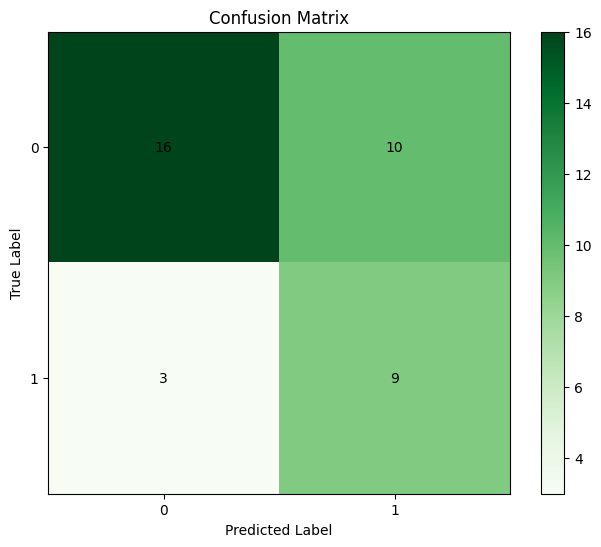

Base64 Encoded Image:
iVBORw0KGgoAAAANSUhEUgAAAyAAAAJYCAYAAACadoJwAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAA/m0lEQVR4nO3debxVZb0/8M8+IAcEDpMDkgxOOQeaZqYJXEkzZ25XTTPErCxLCzW1QnGkScXUtGzQ67XBrkmlpZlDZJqKSNpkoqj8nDBNmQSUs39/IOd2RAx077XPgvf7vNZL99rrPPu7z+vA4Xs+z/OsSrVarQYAAKAATY0uAAAAWHNoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQAAAgMJoQADewEMPPZQ99tgjvXr1SqVSyeTJk2s6/qOPPppKpZLLL7+8puOW2YgRIzJixIhGlwFAnWhAgA7v4Ycfzic+8YlsvPHG6dq1a1paWrLLLrvkggsuyEsvvVTX1x4zZkweeOCBnH322bnyyiuzww471PX1inTEEUekUqmkpaXldb+ODz30UCqVSiqVSr7+9a+v8vhPPvlkJkyYkOnTp9egWgBWF50bXQDAG7n++uvzX//1X2lubs5HPvKRbL

In [15]:
import json
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

def draw_colored_confusion_matrix(confusion_matrix, cmap, text_color, figsize=(8, 6)):
    matrix = np.array(confusion_matrix)
    num_classes = len(matrix)

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(matrix, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set_xticks(np.arange(num_classes))
    ax.set_yticks(np.arange(num_classes))
    ax.set_xticklabels(np.arange(num_classes))
    ax.set_yticklabels(np.arange(num_classes))

    for i in range(num_classes):
        for j in range(num_classes):
            text = ax.text(j, i, str(matrix[i, j]), ha="center", va="center", color=text_color)

    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

    buffer = BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    plt.show()

    cm_image_base64 = base64.b64encode(buffer.getvalue()).decode()

    return cm_image_base64

if __name__ == "__main__":
    json_data = '[[16, 10], [3, 9]]'
    try:
        confusion_matrix = json.loads(json_data)
        user_colormap = input("Enter colormap for confusion matrix (e.g., 'Blues', 'Greens'): ")
        user_text_color = input("Enter text color for confusion matrix (e.g., 'white', 'black'): ")
        cm_image_base64 = draw_colored_confusion_matrix(confusion_matrix, cmap=user_colormap, text_color=user_text_color, figsize=(8, 6))
        print("Base64 Encoded Image:")
        print(cm_image_base64)
    except json.JSONDecodeError as e:
        print("Error decoding JSON data:", e)


Lift Chart

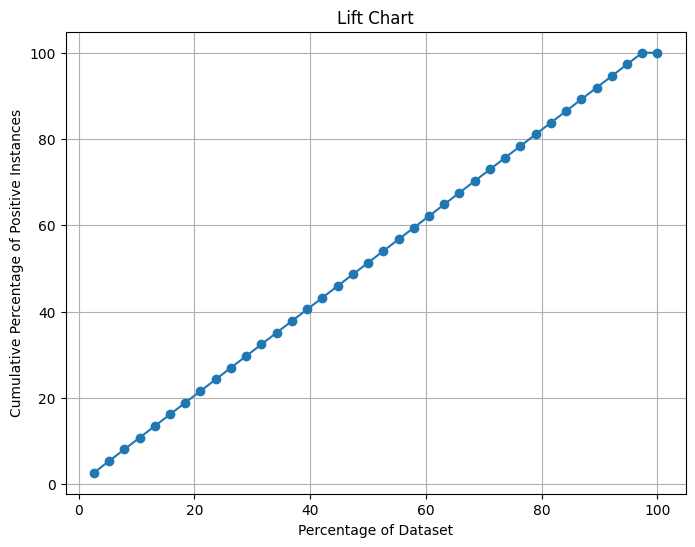

Base64 Encoded Image:
iVBORw0KGgoAAAANSUhEUgAAAyAAAAJYCAYAAACadoJwAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAACBpElEQVR4nOzdd3RU1d7G8WfSE0ihpdBDE0IiVRCxQoBYkGIXFBvci2ADGypgsCDcqyIWFPWCXMAOXECNIMWKBAgthiaEIiRECaQAaTPn/SMvI+OEkGCYyZl8P2u5FnNmz5zfuEPCk90shmEYAgAAAAAX8HJ3AQAAAABqDgIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIAAAAAJchgAAAAABwGQIIANQwe/fulcVi0ezZsx2uJyUlqWPHjgoICJDFYtGxY8fOax1XXnmlYmNjz+s9AADVDwEEADzI7NmzZbFYtH79+kq97siRI7r55psVGBioN998U//9739Vq1Ytvfjii1q0aFGl3is3N1eJiYnq0KGDateurcDAQMXGxu

In [16]:
import json
import matplotlib.pyplot as plt
from io import BytesIO
import base64

def plot_lift_chart(json_data, figsize=(8, 6)):
    data = json.loads(json_data)
    sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

    total_instances = len(data)
    total_positive_instances = sum(1 for _, label in data if label > 0)

    x = []
    y = []
    cumulative_positives = 0

    for idx, (_, label) in enumerate(sorted_data, start=1):
        cumulative_positives += 1 if label > 0 else 0
        percentage_data = (idx / total_instances) * 100
        percentage_positives = (cumulative_positives / total_positive_instances) * 100

        x.append(percentage_data)
        y.append(percentage_positives)

    plt.figure(figsize=figsize)
    plt.plot(x, y, marker='o')
    plt.xlabel("Percentage of Dataset")
    plt.ylabel("Cumulative Percentage of Positive Instances")
    plt.title("Lift Chart")
    plt.grid()

    # Save the plot in BytesIO format
    buffer = BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    plt.show()
    # Convert the image buffer to base64 encoding
    lift_image_base64 = base64.b64encode(buffer.getvalue()).decode()

    return lift_image_base64

if __name__ == "__main__":
    json_data = "[[1, 0.0], [14, 1.583], [27, 1.055], [40, 0.792], [53, 0.633], [66, 0.528], [79, 0.905], [93, 0.792], [106, 1.056], [119, 1.267], [132, 1.152], [145, 1.056], [158, 0.974], [172, 1.131], [185, 1.267], [198, 1.385], [211, 1.49], [224, 1.407], [237, 1.5], [250, 1.583], [264, 1.659], [277, 1.583], [290, 1.652], [303, 1.583], [316, 1.52], [329, 1.462], [343, 1.407], [356, 1.357], [369, 1.31], [382, 1.267], [395, 1.226], [408, 1.187], [422, 1.152], [435, 1.118], [448, 1.086], [461, 1.056], [474, 1.027], [487, 1.0]]"

    # Customize figsize as needed (e.g., figsize=(10, 8))
    lift_image_base64 = plot_lift_chart(json_data, figsize=(8, 6))
    print("Base64 Encoded Image:")
    print(lift_image_base64)


PDP Plot

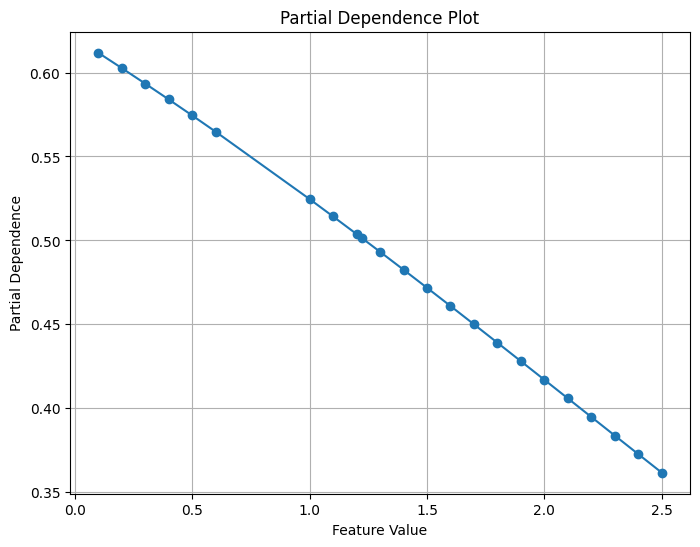

Base64 Encoded Image:
iVBORw0KGgoAAAANSUhEUgAAAyAAAAJYCAYAAACadoJwAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAB/6ElEQVR4nOzde3zO9f/H8ed1XTtcxjaG2YVhzmZYaGsO6eCwSKSDksJXkiilb0qnteqbX4evqEQpVFRSCh0cEuUwVs7nmCFshrGTdrDr8/vD11Vrm7Pr2nXtcb/drhvX5/P+fK7X5b259tzn/f68TYZhGAIAAAAAJzC7ugAAAAAA5QcBBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBAAAAIDTEEAAAAAAOA0BBACukBdeeEEmk+mijr3uuut03XXXXd6CPMDAgQNVr149V5fhNJfyNQQAZRUBBIBHmj59ukwmk+NhtVrVuHFjjRgxQocPH75sr3Py5Em98MILWrZs2WU754WoV6+e4z2azWZVrlxZLVq00AMPPKA1a9a4pC

In [17]:
import matplotlib.pyplot as plt
import json
import base64
from io import BytesIO

# Load the JSON data
json_data = "[[0.1, 0.6117971813559571], [0.2, 0.6026725563085955], [0.3, 0.5934052957223059], [0.4, 0.5839950775994142], [0.5, 0.5744423336342395], [0.6, 0.5647482932111433], [1.0, 0.5246135281770129], [1.1, 0.5142615183634337], [1.2, 0.5037938605649355], [1.224761904761905, 0.5011848428639888], [1.3, 0.4932179566784029], [1.4, 0.48254207421133255], [1.5, 0.47177531658208943], [1.6, 0.46092758519930577], [1.7, 0.45000953366087043], [1.8, 0.4390325145010251], [1.9, 0.42800851899668035], [2.0, 0.4169501106203865], [2.1, 0.4058703527968349], [2.2, 0.39478273168192574], [2.3, 0.3837010747380738], [2.4, 0.37263946592633473], [2.5, 0.3616121583749748]]"
data = json.loads(json_data)

# Extract x and y data from the JSON
x, y = zip(*data)

# Create the PDP plot with adjusted figsize
plt.figure(figsize=(8, 6))  # You can adjust the size as needed
plt.plot(x, y, marker='o')
plt.xlabel("Feature Value")
plt.ylabel("Partial Dependence")
plt.title("Partial Dependence Plot")
plt.grid()

# Save the plot in BytesIO format
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
plt.show()
# Convert the image buffer to base64 encoding
pdp_plot_base64 = base64.b64encode(buffer.getvalue()).decode()

print("Base64 Encoded Image:")
print(pdp_plot_base64)


Calibration Curve

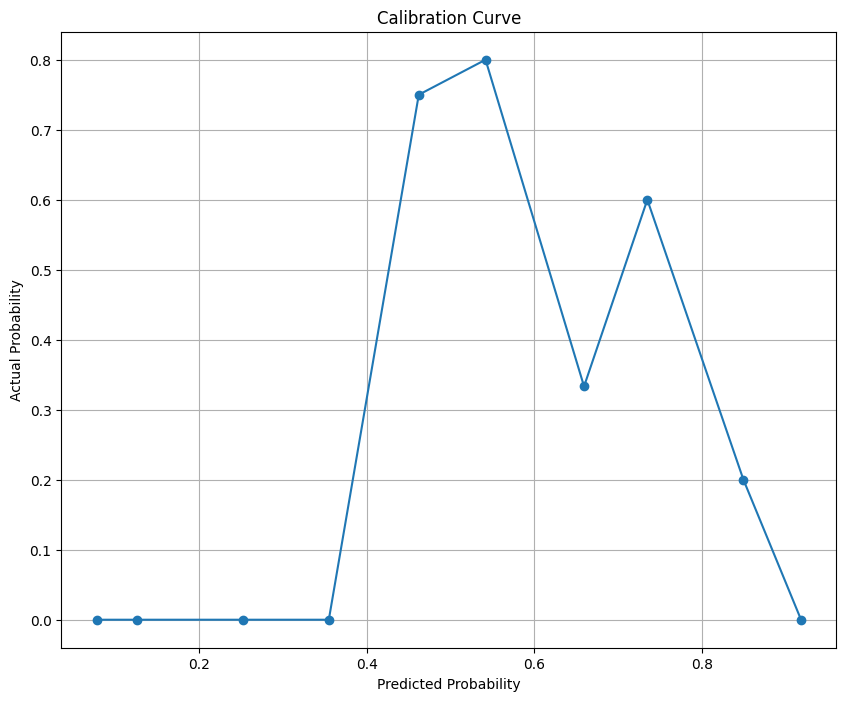

Base64 Encoded Image:
iVBORw0KGgoAAAANSUhEUgAAA+gAAAMgCAYAAACwGEg9AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAACojUlEQVR4nOzdeXiU9bn/8c/MZJnsJGQFw04CYVWsiIqIhEUh1trF2lqVqvVYaW2xnlO6SNHTUj3W2p7a+nOtre3R1uOxAopCEKmKYEH2LIQdshOyk2QyM78/JhMJBEhIZp5nZt6v6+K6zJOZzB14TPLJ9/7eX4vb7XYLAAAAAAAYymp0AQAAAAAAgIAOAAAAAIApENABAAAAADABAjoAAAAAACZAQAcAAAAAwAQI6AAAAAAAmAABHQAAAAAAEyCgAwAAAABgAgR0AAAAAABMgIAOAAAAAIAJENABAAAAADABAjoAAAAAACZAQAcAAAAAwAQI6AAAAAAAmAABHQAAAAAAEyCgAwAAAABgAgR0AAAAAABMgIAOAAAAAIAJENABAAAAADABAjoAAAAAACZAQAcAAAAAwAQI6AAAAAAAmAABHQAAAAAAEyCgAwAAAABgAgR0AAAAAABMgIAOAAAAAIAJENABAAAAADABAjoAAAAAACZAQAcAAAAAwAQI6AAAAAAAmAABHQAAAAAAEyCgAwAAAABgAgR0AAAAAABMgIAOAAAAAIAJENABAAAAADABAjoAAAAAACZAQAcAAAAAwAQI6AAAAAAAmAABHQAAAAAAEyCgAwAAAABgAgR0AAAAAABMgIAOAAAAAIAJENABAAAAADABAjoAAAAAACZAQAcAAAAAwAQI6AAAAAAAmAABHQAAAAAAEyCgAwAAAABgAgR0AAAAAABMgIAOAAAAAIAJENABAAAAADABAjoAAAAAACZAQAcAAAAAwAQI6AAAAAAAmAABHQAAAAAAEyCgAw

In [18]:
import matplotlib.pyplot as plt
import json
import base64
from io import BytesIO

# Load the JSON data
json_data = "[[0.0775025736941102, 0.0], [0.12531744389947905, 0.0], [0.2529160242139393, 0.0], [0.35479802531935456, 0.0], [0.46220339839460656, 0.75], [0.5418798382539232, 0.8], [0.6594757683346523, 0.3333333333333333], [0.7350070794640287, 0.6], [0.8497322903801688, 0.2], [0.9185066565063702, 0.0]]"
data = json.loads(json_data)

# Extract x and y data from the JSON
x, y = zip(*data)

# Create the calibration curve plot with adjusted figsize
plt.figure(figsize=(10, 8))  # You can adjust the size as needed
plt.plot(x, y, marker='o')
plt.xlabel("Predicted Probability")
plt.ylabel("Actual Probability")
plt.title("Calibration Curve")
plt.grid()

# Save the plot in BytesIO format
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
plt.show()
# Convert the image buffer to base64 encoding
calibration_curve_base64 = base64.b64encode(buffer.getvalue()).decode()

print("Base64 Encoded Image:")
print(calibration_curve_base64)


Feature Importance Plot


Enter color for the bars (e.g., 'blue', '#FF5733'): yellow


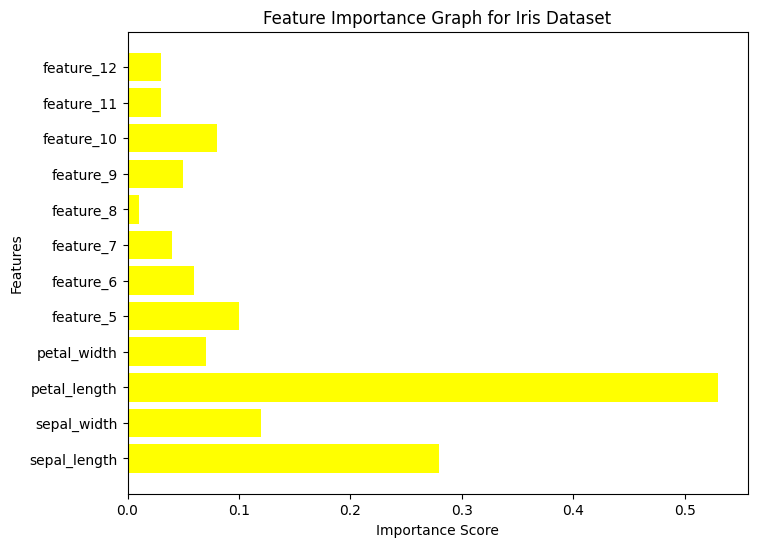

Base64 Plot:
iVBORw0KGgoAAAANSUhEUgAAAyAAAAJYCAYAAACadoJwAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAB5mElEQVR4nO3df3xP9f//8fsx26z9YjP2w9gwixhDaZOmd4So9latd+nNSngn/bR+qNTkx0h7s7fol7dNyD7oB6UoarxDWrLy9tuy1o8Vic3Ca/Pa+f7R1+vtxbAxZz/crpfLuVycc57neR7nnNfmdd/5ZZimaQoAAAAALFCvugsAAAAAcOkggAAAAACwDAEEAAAAgGUIIAAAAAAsQwABAAAAYBkCCAAAAADLEEAAAAAAWIYAAgAAAMAyBBAAAAAAliGAAAAAALAMAQQAAACAZQggAAAAACxDAAEAAABgGQIIAAAAAMsQQAAAAABYhgACAAAAwDIEEAAAAACWIYAAAAAAsAwBBAAAAIBlCCAAAAAALEMAAQAAAGAZAggAAAAAyxBAAAAAAFiGAAIAAADAMgQQAAAAAJYhgAAAAACwDAEEAAAAgGUIIAAAAAAsQwABAAAAYBkCCAAAAADLEEAAAAAAWIYAAgAAAMAyBBAAAAAAliGAAAAAALAMAQQAAACAZQggAAAAACxDAAEAAABgGQIIAAAAAMsQQAAAAABYhgACAAAAwDIEEAAAAACWIYAAAAAAsAwBBAAAAIBlCCAAAAAALEMAAQAAAGAZAggAAAAAyxBAAAAAAFiGAAIAAADAMgQQAAAAAJYhgAAALik9e/ZU+/btz3v548eP64knnlBoaKjq1aun+Pj4qiuuChiGoeTk5OouAwDOiAAC1DIZGRkyDKPc4amnnroo61y/fr2Sk5N16NChi9L/hTixP7766qvqLuW8zZo1SxkZGdVdRpWy2WyaMWOGrrnmGjVq1Ehubm4KDg7

In [19]:
import json
import matplotlib.pyplot as plt
import io
import base64

def draw_transposed_feature_importance_graph(json_file_path, bar_color, figsize=(8, 6)):
    with open(json_file_path, 'r') as file:
        data = json.load(file)

    features = [item['feature'] for item in data['feature_importance']]
    importance_scores = [item['importance_score'] for item in data['feature_importance']]

    plt.figure(figsize=figsize)
    plt.barh(features, importance_scores, color=bar_color)
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.title(f'Feature Importance Graph for {data["dataset_name"]} Dataset')

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)

    plot_base64 = base64.b64encode(buf.read()).decode('utf-8')

    plt.show()

    return plot_base64

if __name__ == "__main__":
    json_file_path = "json_files/feature_importance.json"
    user_bar_color = input("Enter color for the bars (e.g., 'blue', '#FF5733'): ")
    feature_importance_base64_plot = draw_transposed_feature_importance_graph(json_file_path, bar_color=user_bar_color)

    print("Base64 Plot:")
    print(feature_importance_base64_plot)


ROC Curves

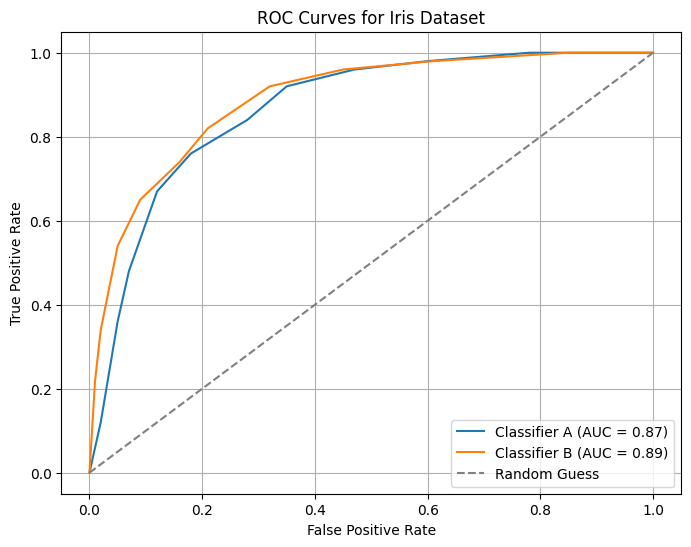

Base64 Plot:
iVBORw0KGgoAAAANSUhEUgAAAyAAAAJYCAYAAACadoJwAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAADHL0lEQVR4nOzdd3xV9f3H8de9N/dmT0ICgUDYU0D2FJUlGxnOKmKdVWurtmpbZ1tt6/617oV7EJAhGwQZMpQle29CBiF73HV+f1wSiazsm9y8n48Hj9x7csYnnNwk7/tdJsMwDERERERERKqB2dsFiIiIiIhI3aEAIiIiIiIi1UYBREREREREqo0CiIiIiIiIVBsFEBERERERqTYKICIiIiIiUm0UQEREREREpNoogIiIiIiISLVRABERERERkWqjACIiIiIiItVGAURERERERKqNAoiIiIiIiFQbBRAREREREak2CiAiIiIiIlJtFEBERERERKTaKICIiIiIiEi1UQAREREREZFqowAiIiIiIiLVRgFERERERESqjQKIiIiIiIhUGwUQERERERGpNgogIiIiIiJSbRRARERERESk2iiAiIiIiIhItVEAERERERGRaqMAIiIiIiIi1UYBREREREREqo0CiIiIiIiIVBsFEBERERERqTYKICIiIiIiUm0UQEREREREpNoogIiIiIiISLVRABERERERkWqjACIiIiIiItVGAURERERERKqNAoiIiIiIiFQbBRAREREREak2CiAiIiIiIlJtFEBERERERKTaKICIiIiIiEi1UQAREREREZFqowAiIiIiIiLVRgFERERERESqjQKIiIiIiIhUGwUQERERERGpNgogIiIiIiJSbRRARERERESk2iiAiIiIiIhItVEAERERERGRaqMAIiIiFZKTk8Mdd9xBgwYNMJlM/OEPf/B2ScUOHTqEyWRi6tSp3i5FRETOUAARkRpt6tSpmEym4n9

In [20]:
import json
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import io
import base64

def plot_roc_curve(json_file_path, figsize=(8, 6)):
    with open(json_file_path, 'r') as file:
        data = json.load(file)

    plt.figure(figsize=figsize)
    for roc_data in data['roc_curves']:
        classifier_name = roc_data['classifier_name']
        fpr = roc_data['false_positive_rate']
        tpr = roc_data['true_positive_rate']

        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for {data["dataset_name"]} Dataset')
    plt.legend(loc='lower right')
    plt.grid(True)

    # Save the plot as an image in memory
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)

    # Convert the image to base64 format
    plot_base64 = base64.b64encode(buf.read()).decode('utf-8')

    plt.show()  # Close the plot to avoid displaying it with plt.show()
    return plot_base64

if __name__ == "__main__":
    json_file_path = "json_files/roc_curve.json"  # Replace with the actual path of your JSON file
    roc_base64_plot = plot_roc_curve(json_file_path)

    print("Base64 Plot:")
    print(roc_base64_plot)


Font Styles

In [21]:
times_new_roman = "\"Times New Roman\", Times, serif"
arial = "Arial, sans-serif"
garamond = "\"Garamond\", serif"
print(garamond)

"Garamond", serif


PDF Generation

In [24]:
from pdf_reports import pug_to_html, write_report


html = pug_to_html(r"./examples/working_example/page2.html",
                   font_style= times_new_roman,
                   title="Classification in Machine Learning",
                   author="Ali Zeeshan",
                   table1=html_table,
                   table2=html_table_performance,
                   multicolor_bar_plot = multicolor_bar_image_base64,
                   metrics_bar_plot = image1_base64,
                   confusion_metrics_plot = cm_image_base64,
                  #  lift_plot = lift_image_base64,
                  #  pdp_plot = pdp_plot_base64,
                  #  calibration_plot = calibration_curve_base64,
                   feature_importance_plot = feature_importance_base64_plot
                  #  roc_plot = roc_base64_plot
                   )

write_report(html, "Classification.pdf")